In [ ]:
#@title Google Drive 
from google.colab import drive
drive.mount('/content/drive')

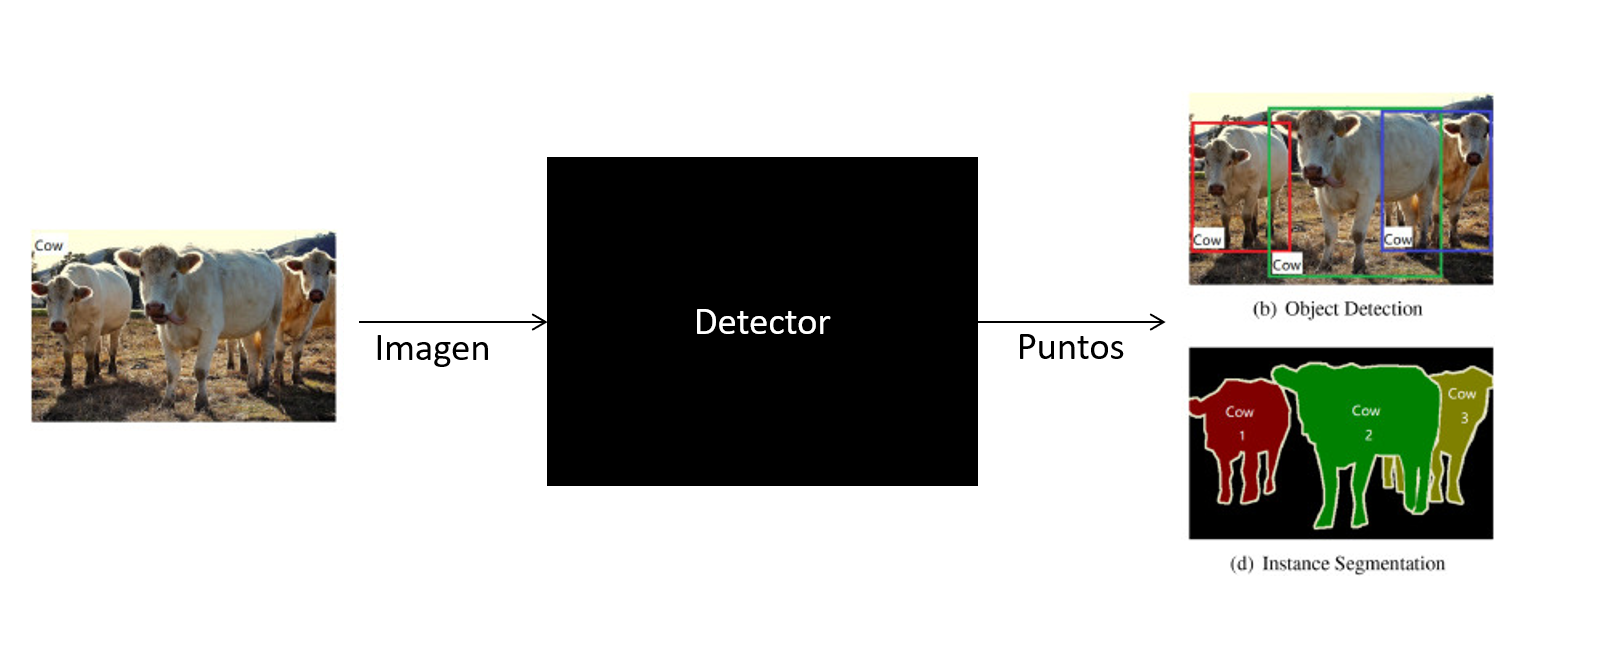

In [ ]:
!nvidia-smi

In [ ]:
exit(0)

# Training Yolo


## Configuration

In [ ]:
#clone darknet repository
import os
os.environ['PATH'] += ':/usr/local/cuda/bin'
!rm -fr darknet
!git clone https://github.com/AlexeyAB/darknet

In [ ]:
!apt install gcc-5 g++-5 -y
!ln -s /usr/bin/gcc-5 /usr/local/cuda/bin/gcc
!ln -s /usr/bin/g++-5 /usr/local/cuda/bin/g++

In [ ]:
#go to the darknet folder, edit and remake Makefiles of GPU and OPENCV
%cd darknet
!sed -i 's/GPU=0/GPU=1/g' Makefile
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!make

In [ ]:
!apt install ffmpeg libopencv-dev libgtk-3-dev python-numpy python3-numpy libdc1394-22 libdc1394-22-dev libjpeg-dev libtiff5-dev libavcodec-dev libavformat-dev libswscale-dev libxine2-dev libgstreamer1.0-dev libgstreamer-plugins-base1.0-dev libv4l-dev libtbb-dev qtbase5-dev libfaac-dev libmp3lame-dev libopencore-amrnb-dev libopencore-amrwb-dev libtheora-dev libvorbis-dev libxvidcore-dev x264 v4l-utils unzip

## dataset maker

In [ ]:
%cd /content/drive/MyDrive/Walmart/Codes/dataset_maker

path_dataset_All="/content/drive/MyDrive/Walmart/YOLO/03-Datasets-L041-C2/Dataset_All_filter"

!sh data_maker.sh $path_dataset_All

In [ ]:
!ls $path_dataset_All | wc -l

In [ ]:
path_dataset="/content/drive/MyDrive/Walmart/YOLO/03-Datasets-L041-C2/filter/"

%cp ./output_data_maker/train.txt $path_dataset
%cp ./output_data_maker/test.txt  $path_dataset
%cp ./output_data_maker/valid.txt $path_dataset

%cp ./output_data_maker/train.txt /content/darknet/data/
%cp ./output_data_maker/test.txt  /content/darknet/data/
%cp ./output_data_maker/valid.txt /content/darknet/data/

## Training

In [ ]:

with open('/content/darknet/data/obj.names', 'w') as g:
    g.write("persona"+"\n")
    g.write("carro normal"+"\n")



%cp /content/drive/MyDrive/Walmart/Repositories/darknet/cfg/yolov4-tiny-custom_two_classes.cfg /content/darknet/cfg/cfg_file.cfg

In [ ]:
%cd /content/darknet/
%rm data/obj.data
import os

path_backup = "/content/drive/MyDrive/Walmart/YOLO/03-Datasets-L041-C2/filter/backup"
os.makedirs(path_backup, exist_ok= True)
log = path_backup + "/log.txt"
with open("data/obj.data", 'a') as f:
    f.write("classes = 2"+'\n')
    f.write("train = data/train.txt"+'\n')
    f.write("valid = data/valid.txt"+'\n')
    f.write("names = data/obj.names"+'\n')
    f.write(f'backup = {path_backup}')

!chmod +x ./darknet

In [ ]:
!./darknet detector train data/obj.data cfg/cfg_file.cfg -dont_show -map | tee -a $log

In [ ]:
%cp chart.png /content/drive/MyDrive/Walmart/YOLO/03-Datasets-L041-C2/filter/backup/

# statistics

In [ ]:
%cd /content/drive/MyDrive/Walmart/Repositories/yolo_statistics

In [ ]:
!sh run.sh

In [ ]:
%cd /content
!git clone https://github.com/opencv/opencv
!git clone https://github.com/opencv/opencv_contrib
!mkdir /content/build
%cd /content/build
!cmake -DOPENCV_EXTRA_MODULES_PATH=/content/opencv_contrib/modules  -DBUILD_SHARED_LIBS=OFF  -DBUILD_TESTS=OFF  -DBUILD_PERF_TESTS=OFF -DBUILD_EXAMPLES=OFF -DWITH_OPENEXR=OFF -DWITH_CUDA=ON -DWITH_CUBLAS=ON -DWITH_CUDNN=ON -DOPENCV_DNN_CUDA=ON /content/opencv
!make -j8 install

In [ ]:
!cp  /content/build/lib/python3/cv2.cpython-36m-x86_64-linux-gnu.so   "/content/drive/MyDrive/Walmart/Repositories/yolo_statistics/"


# extra

In [ ]:
import os
import shutil 
path= "/content/drive/MyDrive/Walmart/YOLO/03-Datasets-L041-C2/Dataset_All"
dst_path = "/content/drive/MyDrive/Walmart/YOLO/03-Datasets-L041-C2/Dataset_All_filter"

os.makedirs(dst_path, exist_ok=True)
list_files = os.listdir(path)
list_files.sort()
for x, files in enumerate(list_files):
    print(x)
    if files.endswith(".txt"):
        path_file = os.path.join(path, files)
        with open(path_file, 'r') as f:
            lines = f.readlines()
        dst_path_file = os.path.join(dst_path, files)
        with open(dst_path_file, 'w') as g:
            for line in lines:
                if int(line[0]) < 2:
                    g.write(line)
    else:
        path_file = os.path.join(path, files)
        dst_path_file = os.path.join(dst_path, files)
        try:
            shutil.copy(path_file, dst_path_file)
        except:
            print("error", path_file)
